In [6]:
%matplotlib inline
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

In [160]:
f = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2012.h5", 'r')

ERROR:root:got <class 'TypeError'> exception: __init__() got an unexpected keyword argument 'allowed_methods'


OSError: Unexpected exception

In [414]:
f

<HDF5 file "nsrdb_2012.h5" (mode r)>

In [159]:
len(list(f)) 

NameError: name 'f' is not defined

In [416]:
type(f)

h5pyd._hl.files.File

In [417]:
with h5pyd.File('/nrel/nsrdb/v3/nsrdb_2011.h5', mode='r') as f:
    # Extract time_index and convert to datetime
    # NOTE: time_index is saved as byte-strings and must be decoded
    time_index = pd.to_datetime(f['time_index'][...].astype(str))
    # Initialize DataFrame to store time-series data
    time_series = pd.DataFrame(index=time_index)
    # Extract variables needed to compute generation from SAM:
    for var in ['day_of_year','dni','dhi','relative_humidity','wind_direction', 'wind_speed','dew_point','air_temperature','clearsky_dhi', 'clearsky_dni','cloud_type','total_precipitable_water']:
            
            if var == 'day_of_year':
                time_series[var] = time_series.index.dayofyear
            else:
                # Get dataset
                ds = f[var]
                # Extract scale factor
                scale_factor = ds.attrs['psm_scale_factor']
                # Extract site 100 and add to DataFrame
                time_series[var] = ds[:, 100] / scale_factor

In [418]:
time_series.dni[0:48].mean()


19.208333333333332

In [419]:
time_series.shape[0]/48

365.0

In [420]:
time_series = time_series.loc[time_series.index >= '2011-05-14 00:00:00']
time_series['day_of_year'] = time_series.index.dayofyear

In [421]:
daily_data = pd.DataFrame()

In [422]:
# print(f'what is wanted: {time_series[:48].shape}')

for i in range(0,time_series.shape[0],48):
    #print(time_series[i:i+48].mean(axis=0))
    daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17712\13606620.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\13606620.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\13606620.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\13606620.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [423]:
daily_data.iloc[0]

day_of_year                 134.000000
dni                         292.458333
dhi                          42.854167
relative_humidity            86.515625
wind_direction              136.150000
wind_speed                    4.489583
dew_point                    21.875000
air_temperature              25.145833
clearsky_dhi                 32.291667
clearsky_dni                323.041667
cloud_type                    2.750000
total_precipitable_water      3.888833
Name: 0, dtype: float64

In [424]:
# daily_data = pd.DataFrame()
# print(f'what is wanted: {time_series[:48].shape}')
for year in range(12,21):
    with h5pyd.File(f'/nrel/nsrdb/v3/nsrdb_20{year}.h5', mode='r') as f:
        # Extract time_index and convert to datetime
        # NOTE: time_index is saved as byte-strings and must be decoded
        time_index = pd.to_datetime(f['time_index'][...].astype(str))
        # Initialize DataFrame to store time-series data
        time_series = pd.DataFrame(index=time_index)
        # Extract variables needed to compute generation from SAM:
        for var in ['day_of_year','dni','dhi','relative_humidity','wind_direction', 'wind_speed','dew_point','air_temperature','clearsky_dhi', 'clearsky_dni','cloud_type','total_precipitable_water']:
            
            if var == 'day_of_year':
                time_series[var] = time_series.index.dayofyear
            else:
                # Get dataset
                ds = f[var]
                # Extract scale factor
                scale_factor = ds.attrs['psm_scale_factor']
                # Extract site 100 and add to DataFrame
                time_series[var] = ds[:, 100] /scale_factor


    for i in range(0,time_series.shape[0],48):
        #print(time_series[i:i+48].mean(axis=0))
        daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17712\2481898116.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\2481898116.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\2481898116.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = daily_data.append(time_series[i:i+48].mean(axis=0),ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\2481898116.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [425]:
daily_data.iloc[1]

day_of_year                 135.000000
dni                          50.479167
dhi                          62.854167
relative_humidity            86.591042
wind_direction              129.137500
wind_speed                    5.845833
dew_point                    21.812500
air_temperature              24.895833
clearsky_dhi                 33.562500
clearsky_dni                314.375000
cloud_type                    2.500000
total_precipitable_water      4.145042
Name: 1, dtype: float64

In [ ]:
daily_data.to_excel('nsrdb_2011May14_2020_10years_daily.xlsx')

In [426]:
daily_data[134:].shape

(3386, 12)

In [427]:
bus_data = pd.read_excel('Bus Barn and Car Charging Solar Data.xlsx')

In [428]:
flow = bus_data.iloc[:,1].drop(0,axis=0)

In [429]:
flow = flow.reset_index().drop('index',axis=1)

In [430]:
flow['Unnamed: 1']

0                 0
1                 0
2                 0
3                 0
4                 0
            ...    
108321     5.203238
108322     7.773371
108323    11.066359
108324     4.890486
108325     8.376925
Name: Unnamed: 1, Length: 108326, dtype: object

In [431]:
def clear_func(x):
    try:
        if x > 40:
            return 0 
        else: 
            return x
    except:
        return 0 
    

In [432]:
flow = flow["Unnamed: 1"].apply(clear_func)

In [433]:
flow[0:24].mean(axis=0)

0.548614423271426

In [434]:
bus_data = pd.DataFrame(columns=['mean','sum'])

In [435]:
bus_data

,mean,sum


In [436]:
flow[0:0+24].mean(axis=0).item(), flow[0:0+24].sum(axis=0).item()

(0.548614423271426, 13.166746158514222)

In [437]:
for i in range(0,flow.shape[0],24):
    #print(time_series[i:i+48].mean(axis=0))
    try:
        bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
    except:
        print({'mean':flow[i:i+24].mean(axis=0),'sum':flow[i:i+24].sum(axis=0)})

C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local

C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17712\4228109002.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bus_data = bus_data.append({'mean':flow[i:i+24].mean(axis=0).item(),'sum':flow[i:i+24].sum(axis=0).item()},ignore_index=True)
C:\Users\HP\AppData\Local

In [438]:
bus_data[:6]

,mean,sum
0,0.548614,13.166746
1,4.917101,118.010418
2,7.255619,174.134858
3,7.285780,174.858719
4,6.880336,165.128067
5,6.177652,148.263639


In [439]:
import matplotlib.pyplot as plt

In [440]:
bus_data['sum'].tolist(), bus_data.shape[0]

([13.166746158514222,
  118.01041782995415,
  174.13485834584128,
  174.85871866259941,
  165.1280674611292,
  148.26363925894933,
  111.55013100848555,
  159.99717987445388,
  95.52308249561355,
  194.70886883985247,
  165.54838037226233,
  51.919788867507094,
  193.71362269995217,
  150.28186378013984,
  81.00711790325781,
  60.43673964219114,
  211.06157945695273,
  167.15084296544356,
  208.83073251247313,
  41.957178541294184,
  207.55710777084346,
  130.22340744302502,
  182.475621462167,
  207.62988558513726,
  210.62716333325943,
  167.01898352728324,
  43.842523362273795,
  94.05386128418905,
  90.25685816437633,
  160.43154955459988,
  138.06423771944412,
  128.07375751466788,
  110.84044923690914,
  211.4103416906164,
  119.28963143209384,
  76.11311104587878,
  153.77157691626746,
  151.2120067792551,
  172.36139788909495,
  56.836388975343084,
  84.30571949021093,
  189.28442792024993,
  44.27971869071153,
  192.98142584104275,
  171.6184845935814,
  228.52652071339804,
  

In [441]:
bus_data.iloc[2110]

mean      6.033087
sum     144.794082
Name: 2110, dtype: float64

In [442]:
bus_data['mean'].argmax()


2236

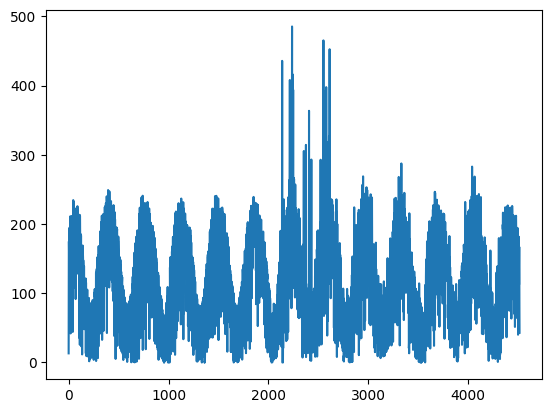

In [443]:
plt.plot(bus_data['sum'].tolist())

In [7]:
#full_data = pd.concat([bus_data,daily_data],axis=1)
full_data = pd.read_excel('full.xlsx')

In [8]:
full_data = full_data.dropna(axis=0)

In [9]:
print(full_data)

      Unnamed: 0      mean         sum  day_of_year         dni         dhi  \
0              0  0.548614   13.166746          134  292.458333   42.854167   
1              1  4.917101  118.010418          135   50.479167   62.854167   
2              2  7.255619  174.134858          136  242.895833   46.145833   
3              3  7.285780  174.858719          137  228.729167   60.729167   
4              4  6.880336  165.128067          138  175.020833   79.062500   
...          ...       ...         ...          ...         ...         ...   
3515        3515  1.022005   24.528118          362  396.312500   51.479167   
3516        3516  1.813210   43.517045          363  378.895833   80.770833   
3517        3517  0.857416   20.577987          364  144.000000  108.375000   
3518        3518  2.427310   58.255443          365  120.000000  154.416667   
3519        3519  0.582515   13.980354          366  282.083333  104.541667   

      relative_humidity  wind_direction  wind_speed

In [10]:
targets = ['sum']
features = ['day_of_year', 'dni', 'dhi', 'relative_humidity', 'wind_direction', 'wind_speed', 'dew_point', 'air_temperature', 'clearsky_dhi', 'clearsky_dni', 'cloud_type', 'total_precipitable_water']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

In [12]:
full_data[features].to_numpy(),full_data[targets].to_numpy()

(array([[134.        , 292.45833333,  42.85416667, ..., 323.04166667,
           2.75      ,   3.88883333],
        [135.        ,  50.47916667,  62.85416667, ..., 314.375     ,
           2.5       ,   4.14504167],
        [136.        , 242.89583333,  46.14583333, ..., 328.04166667,
           0.83333333,   2.96270833],
        ...,
        [364.        , 144.        , 108.375     , ..., 429.3125    ,
           4.04166667,   5.15625   ],
        [365.        , 120.        , 154.41666667, ..., 408.35416667,
           5.58333333,   5.25416667],
        [366.        , 282.08333333, 104.54166667, ..., 414.72916667,
           3.625     ,   4.96875   ]]),
 array([[ 13.16674616],
        [118.01041783],
        [174.13485835],
        ...,
        [ 20.57798661],
        [ 58.25544295],
        [ 13.98035421]]))

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(full_data[features].to_numpy(), full_data[targets].to_numpy().reshape(-1,),shuffle=False, test_size=0.2, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

In [73]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers):
        super(TransformerModel, self).__init__()
        
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim
            ),
            num_layers=num_layers
        )
        
        self.fc = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        x = self.transformer(x)
        x = self.fc(x[:, -1, :])  # Take the output of the last time step
        return x


In [74]:
def prepare_batches(X, y, batch_size):
    num_samples = len(X)
    num_batches = num_samples // batch_size
    X_batched = np.array_split(X, num_batches)
    y_batched = np.array_split(y, num_batches)
    return zip(X_batched, y_batched)

In [75]:
batched_train_data = prepare_batches(X_train, y_train, batch_size=32)

In [76]:
input_dim = X_train.shape[1]
output_dim = 1
num_heads = 2
hidden_dim = 128
num_layers = 2

# Initialize the model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers)

In [77]:
model = model.to(device)

In [78]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [79]:
X_train.shape

torch.Size([2816, 12])

In [80]:
y_train

tensor([1.3167e+01, 1.1801e+02, 1.7413e+02,  ..., 3.2617e+01, 8.4431e-02,
        5.0234e+01], device='cuda:0')

In [83]:
batch_size = 4

In [84]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [163]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for X_batch, y_batch in train_loader:
        #print(X_batch.view(batch_size,1,-1).shape)
        outputs = model((X_batch.view(batch_size,1,-1)))
        loss = criterion(outputs.squeeze(), y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Calculate average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')
    with torch.no_grad():
        test_outputs = model(X_test.view(X_test.shape[0],1,-1))
        test_loss = criterion(test_outputs, y_test)
        print(f'Test Loss: {test_loss.item():.4f}')

Epoch [1/5], Loss: 3051.5749
Test Loss: 6687.7510
Epoch [2/5], Loss: 2999.6631
Test Loss: 7137.9316
Epoch [3/5], Loss: 2981.3357
Test Loss: 6513.1538
Epoch [4/5], Loss: 3006.1626
Test Loss: 6616.6377
Epoch [5/5], Loss: 2993.8802
Test Loss: 6538.2563


In [171]:
torch.save(model,'daily_transformer')

In [164]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test.view(X_test.shape[0],1,-1))
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 6597.9038


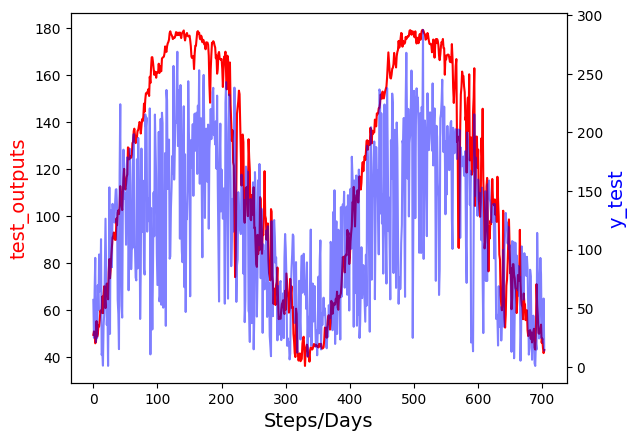

In [170]:

import matplotlib.pyplot as plt
n = -1
i=0
look = "test_outputs"
ff = "y_test"
#dd_df = pd.read_csv(f"results/.csv")
#dd_df = dd_df.fillna(0)
# dd_df = dd_df.drop("date", axis=1)
#dd_df = dd_df.astype('float')

fig,ax = plt.subplots()
ax.plot(test_outputs.cpu(),
        color="red")

ax.set_xlabel("Steps/Days", fontsize = 14)
# set y-axis label
ax.set_ylabel(look,
        color="red",
        fontsize=14)

ax2=ax.twinx()

ax2.plot(y_test.cpu(),color="blue",alpha = 0.5)
ax2.set_ylabel(f"{ff}",color="blue",fontsize=14)


fig.savefig(f'actionXtruth.jpg',
        format='jpeg',
        dpi=100,
        bbox_inches='tight')


In [478]:
full_data .to_excel('full.xlsx')

In [15]:
!pip install gym stable-baselines3

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import gym
from gym import spaces

In [85]:
X_train

tensor([[134.0000, 292.4583,  42.8542,  ..., 323.0417,   2.7500,   3.8888],
        [135.0000,  50.4792,  62.8542,  ..., 314.3750,   2.5000,   4.1450],
        [136.0000, 242.8958,  46.1458,  ..., 328.0417,   0.8333,   2.9627],
        ...,
        [ 25.0000,  56.1250, 122.2292,  ..., 393.6458,   6.3125,   5.7562],
        [ 26.0000,  42.5417, 151.3542,  ..., 416.1458,   6.7917,   5.8292],
        [ 27.0000,  70.7083, 153.1667,  ..., 405.6458,   4.0208,   6.1521]],
       device='cuda:0')

In [86]:
y_train.max()

tensor(485.2926, device='cuda:0')

In [156]:
class BusArrayEnv(gym.Env):
   
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                 df,
                 df_true,
                step_index = 0,
                episode_no = 0,
                save_logs = True,
                env_type = "train"):
        
        self.type = env_type
        self.df = df
        self.df_true = df_true
        self.save_logs = save_logs
        #self.action_space = spaces.Discrete(2,)
        self.action_space = spaces.Box(low = 0, high = (self.df_true.max().item() + 100),shape = (1,)) 
        # [remaining cash] + [stock price] + [technical features] + [number of stocks]
        self.observation_space = spaces.Box(low=-np.inf, 
                                            high=np.inf, 
                                            shape = (df.shape[1],))

        # load data from a pandas dataframe
        # self.data = self.df.loc[[self.step_index]]
        # [0] for drawdown till now + [0] is for % of cash/initial_amount + [0] for % return since last purchase from 0 stocks + [0] for action + 7 x [0] for pct change in asset memories
        self.step_index = step_index
        self.state = self.df[step_index,:]
        self.truth = self.df_true[step_index].item()
        self.terminal = False           

        self.reward = 0.0   
        
        self.episode_count = episode_no
        
        self.reward_memory = []
        self.date_memory=[]
        self.action_memory = []
        self.truth_memory = []

    def _append_memories(self, action):
        # store memories
        self.action_memory.append(action)    
        self.date_memory.append(int(self.state[0]))
        self.truth_memory.append(self.truth)   
        self.reward_memory.append(self.reward)
        #self.action_required_asset.append(required_stock_amount
    

    def _terminal_step(self, action=None):
        self.reward = -((action - self.truth)**2 )
        self._append_memories(action)
        #self.step_index += 1
        #self.state = self.df[self.step_index,:]
        #self.truth = self.df_true[self.step_index]
        logs_df = pd.DataFrame()

        logs_df['date'] = self.date_memory
        logs_df['action'] = self.action_memory
        logs_df['truth'] = self.truth_memory
        logs_df['reward'] = self.reward_memory      
        #import pdb; pdb.set_trace()
        #logs_df.drop('return_pct_change',axis=1)
        logs_df.to_csv(f"results/logs/log_episode_{self.episode_count}.csv",index=False)
        
        
        if self.save_logs:
            with open(f"results/logs/consol_log_{self.episode_count}.txt","w+") as f:
                f.write(f"Episode: {self.episode_count}\nSteps Taken: {self.step_index+1}\nterminal_reward: {self.reward}\nmean_reward: {sum(self.reward_memory)/len(self.reward_memory)}\n")

        #self._apply_reward_threshold_alpha(alpha=self.reward_threshold_alpha)
        #self.reward = self.cumulative_reward
        self.episode_count += 1
        
        
    def step(self, action):
        action = round(float(action),4)
        self.terminal = self.step_index >= self.df.shape[0] -1
        
            
        if self.terminal:
           self._terminal_step(action=action)
            
        else:
            
            self.reward = -((action - self.truth)**2)
            self._append_memories(action)
            self.step_index += 1
            self.state = self.df[self.step_index,:]
            self.truth = self.df_true[self.step_index].item()
            
            #self.date_memory.append(int(self.state[0]))      

        return self.state, self.reward, self.terminal, {}
        

    def reset(self):
        self.step_index = 0
        self.state = self.df[self.step_index,:]
        self.truth = self.df_true[self.step_index].item()
        self.terminal = False           

        self.reward = 0.0   
        self.reward_memory = []
        self.date_memory=[]
        self.action_memory = []
        self.truth_memory = []


        return self.state
    
    def render(self, mode='human'):
        return self.state, self.cash, self.stocks_owned, self.close_price
    
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh

In [131]:
y_train.max()

tensor(485.2926, device='cuda:0')

In [132]:
X_train[0,:]

tensor([134.0000, 292.4583,  42.8542,  86.5156, 136.1500,   4.4896,  21.8750,
         25.1458,  32.2917, 323.0417,   2.7500,   3.8888], device='cuda:0')

In [133]:
from stable_baselines3.common.evaluation import evaluate_policy
import time
from stable_baselines3.common.vec_env import DummyVecEnv

In [157]:
env_train = DummyVecEnv([lambda: BusArrayEnv(df=X_train.cpu(), df_true = y_train.cpu(),episode_no=1000)])

/space/akislam/.local/lib/python3.8/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [158]:
"""""TD3 model"""

from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
def train_TD3(env_train, model_name, data_length, device, episodes=2, exploration=0):

    # add the noise objects for DDPG

    batch_size=8
    buffer_size=100000
    # episodic=False
    gamma= 0.9
    lr= 0.000111834574100761
    noise_std= 0.93948896639477
    noise_type= 'orn'
    #train_freq= 16
    tau=0.001
    target_noise_clip=0.01
    policy_delay=5

    
    policy_kwargs = dict(net_arch=[300, 500, 300])

    n_actions = env_train.action_space.shape[-1]
    #param_noise = None
    
    if noise_type=='normal':
        action_noise=NormalActionNoise(mean=np.zeros(n_actions), sigma=noise_std * np.ones(n_actions))
    else:
        action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=noise_std * np.ones(n_actions))
        

    start = time.time()
    #env_train.reset()
    TD3_model = TD3('MlpPolicy', env_train, verbose=0, 
            
            batch_size=batch_size,
            buffer_size=int(buffer_size),
            gamma=gamma,
            learning_rate=lr,
            #train_freq=train_freq,
            action_noise=action_noise,
            policy_kwargs=policy_kwargs,
            target_noise_clip=target_noise_clip,
            #optimize_memory_usage=False,
            policy_delay=policy_delay,
            tau=tau,
            learning_starts=exploration * data_length,
            device=device)
    TD3_model.learn(total_timesteps=episodes*data_length)
 
    end = time.time()

    TD3_model.save(f"results/{model_name}")
    print('Training time (TD3): ', (end-start)/60,' minutes')
    return TD3_model

TD3_model = train_TD3(env_train, "second_xxx", data_length=X_train.shape[0] - 1, device='cuda', episodes=63, exploration=3)


Training time (TD3):  14.347648755709331  minutes


In [149]:
env_train

array([[134.       , 292.45834  ,  42.854168 ,  86.515625 , 136.15     ,
          4.4895835,  21.875    ,  25.145834 ,  32.291668 , 323.04166  ,
          2.75     ,   3.8888333]], dtype=float32)

In [151]:
TD3_model = TD3.load('results/xxx', env=env_train)

In [152]:

start = time.time()
TD3_model.learn(total_timesteps=100*(X_train.shape[0] - 1))

end = time.time()
model_name = 'xxx_160'
TD3_model.save(f"results/{model_name}")
print('Training time (TD3): ', (end-start)/60,' minutes')

Training time (TD3):  25.369437789916994  minutes


In [153]:

start = time.time()
TD3_model.learn(total_timesteps=100*(X_train.shape[0] - 1))

end = time.time()
model_name = 'xxx_260'
TD3_model.save(f"results/{model_name}")
print('Training time (TD3): ', (end-start)/60,' minutes')

Training time (TD3):  27.218999234835305  minutes


In [154]:

start = time.time()
TD3_model.learn(total_timesteps=500*(X_train.shape[0] - 1))

end = time.time()
model_name = 'xxx_760'
TD3_model.save(f"results/{model_name}")
print('Training time (TD3): ', (end-start)/60,' minutes')

Training time (TD3):  143.07195095618565  minutes


In [175]:
#full_data = pd.concat([bus_data,daily_data],axis=1)
full_data = pd.read_excel('hourly_full_data.xlsx')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(full_data[features].to_numpy(), full_data[targets].to_numpy().reshape(-1,),shuffle=False, test_size=0.2, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
input_dim = X_train.shape[1]
output_dim = 1
num_heads = 2
hidden_dim = 128
num_layers = 2

# Initialize the model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers)
model = model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
batch_size = 4
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


Epoch [1/20], Loss: 40.8630
Test Loss: 81.1859


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/20], Loss: 40.6702
Test Loss: 82.6162


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [3/20], Loss: 40.4505
Test Loss: 85.3181


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [4/20], Loss: 40.3742
Test Loss: 83.7063


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [5/20], Loss: 40.3430
Test Loss: 82.0759


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [6/20], Loss: 40.2507
Test Loss: 83.0858


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [7/20], Loss: 40.2476
Test Loss: 82.2550


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [8/20], Loss: 40.2009
Test Loss: 82.0155


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [9/20], Loss: 40.1245
Test Loss: 82.9093


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/20], Loss: 40.0749
Test Loss: 81.7733


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [11/20], Loss: 40.0370
Test Loss: 83.0978


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [12/20], Loss: 40.1020
Test Loss: 80.7478


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [13/20], Loss: 40.0103
Test Loss: 83.7302


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [14/20], Loss: 39.9810
Test Loss: 79.5617


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [15/20], Loss: 39.9801
Test Loss: 79.1302


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [16/20], Loss: 39.9435
Test Loss: 79.6586


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [17/20], Loss: 39.8845
Test Loss: 81.1632


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [18/20], Loss: 39.8420
Test Loss: 77.5527


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [19/20], Loss: 39.8707
Test Loss: 79.4790


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [20/20], Loss: 39.9229
Test Loss: 80.8549


/space/akislam/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16896])) that is different to the input size (torch.Size([16896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


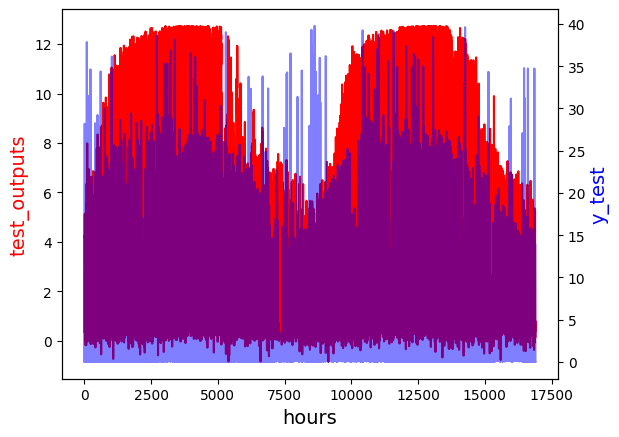

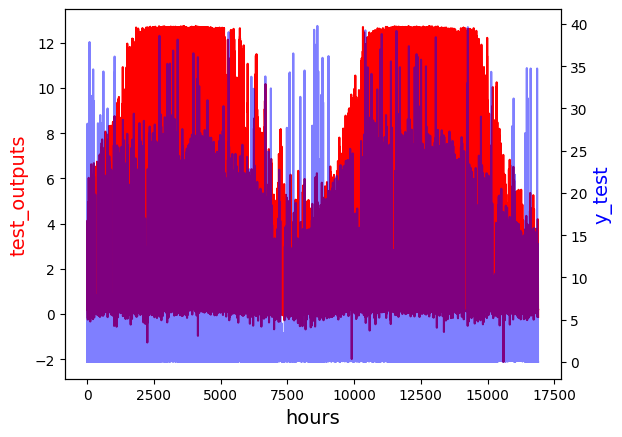

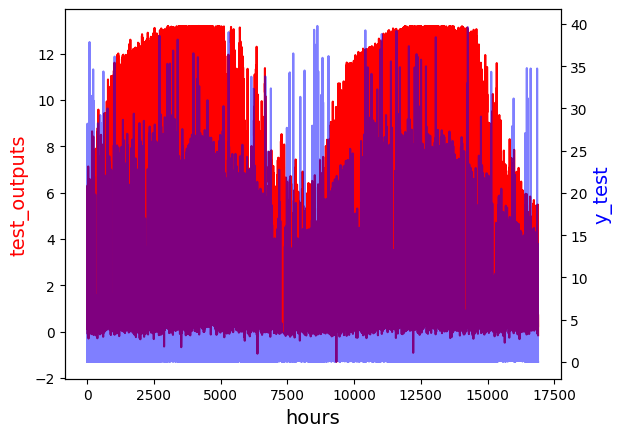

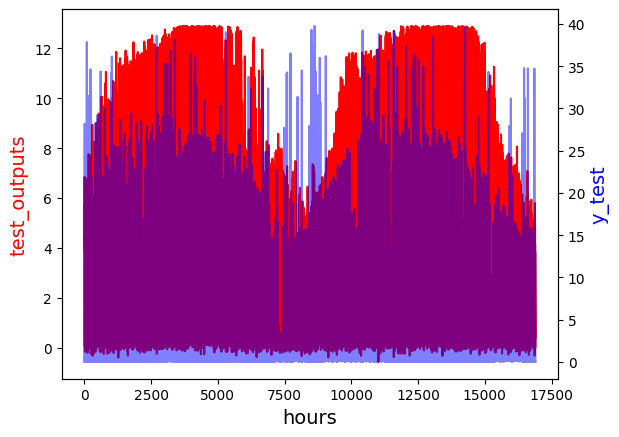

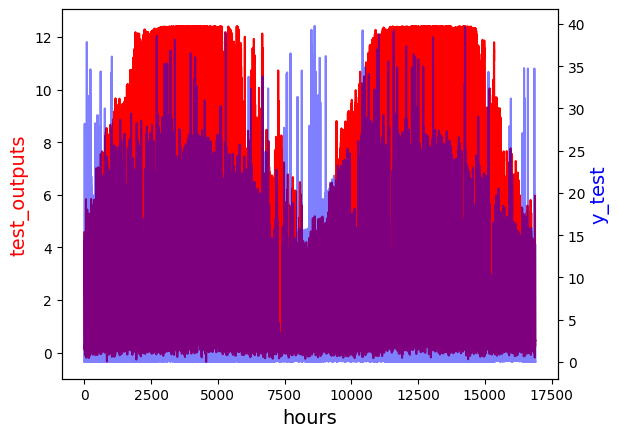

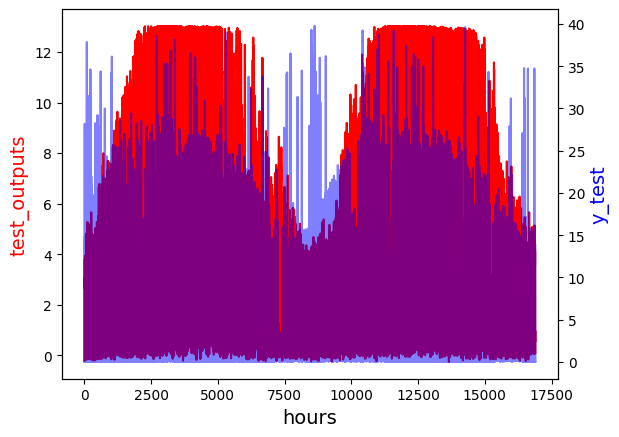

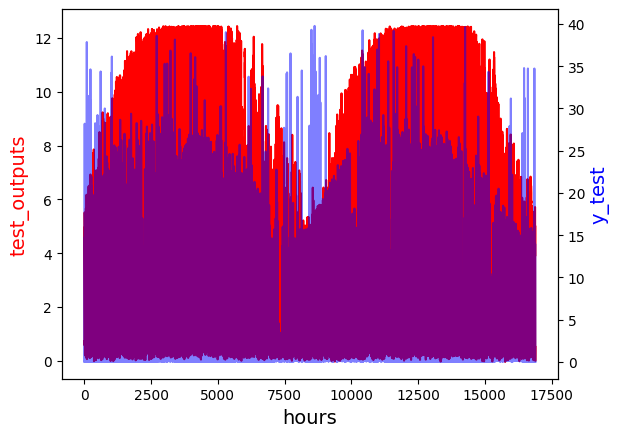

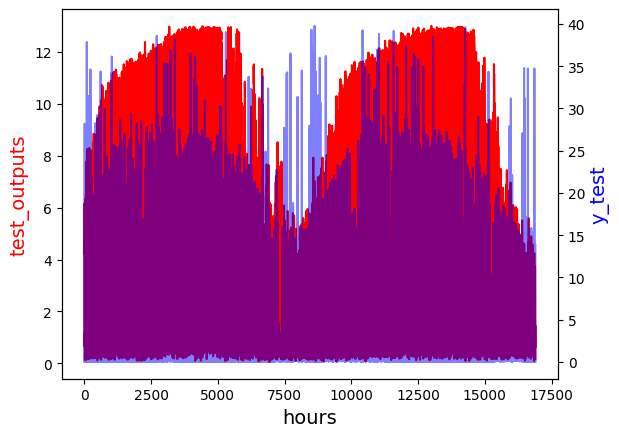

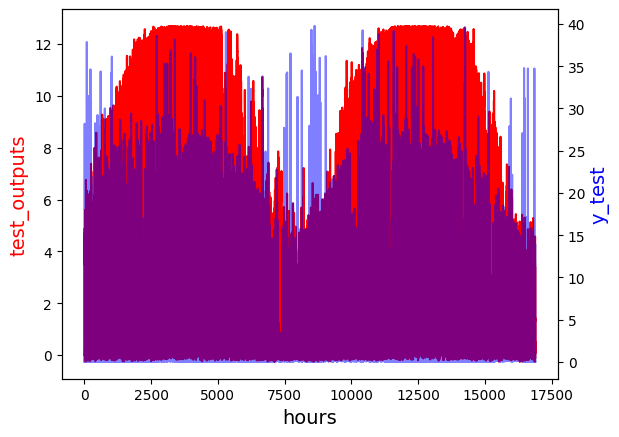

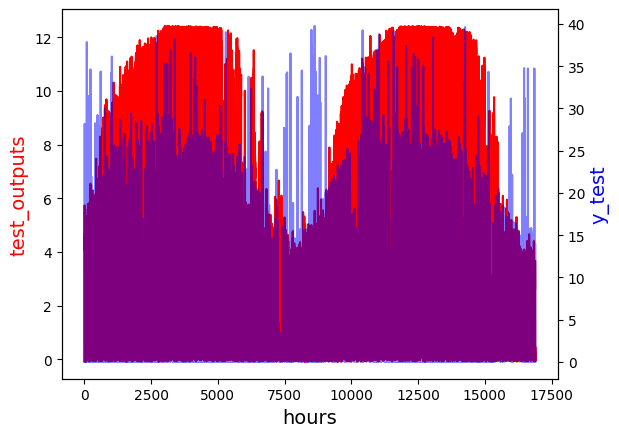

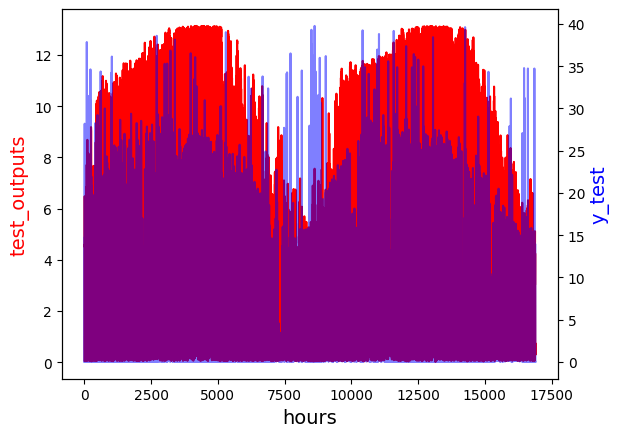

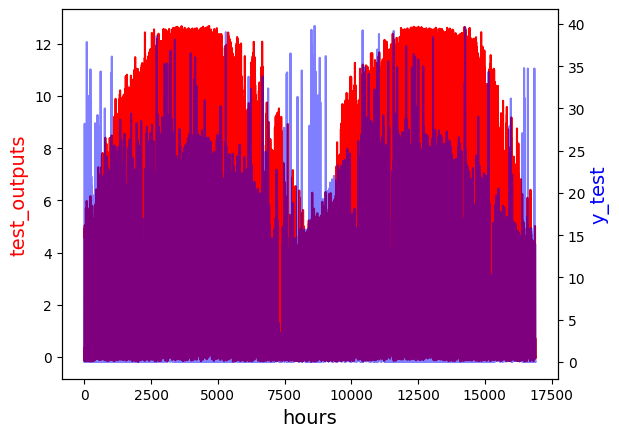

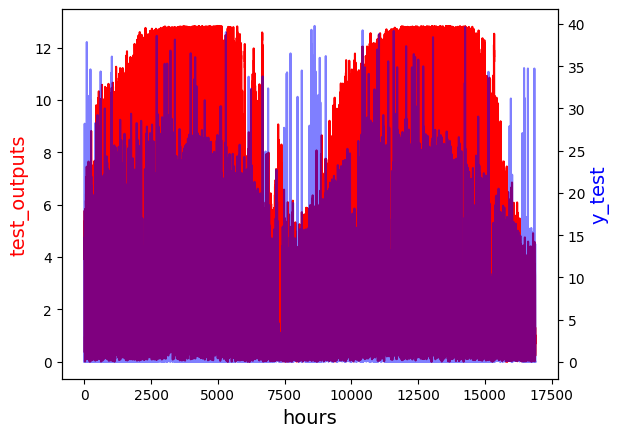

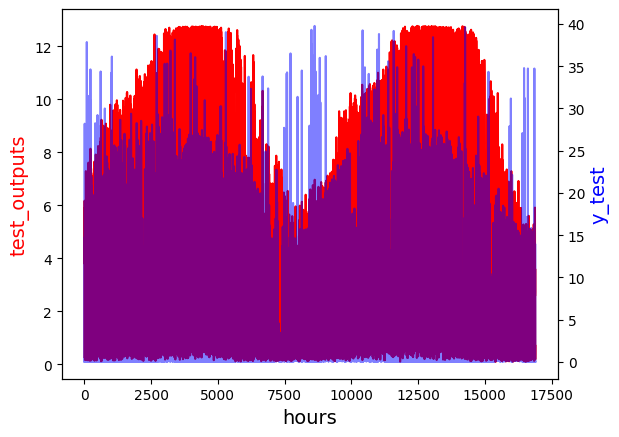

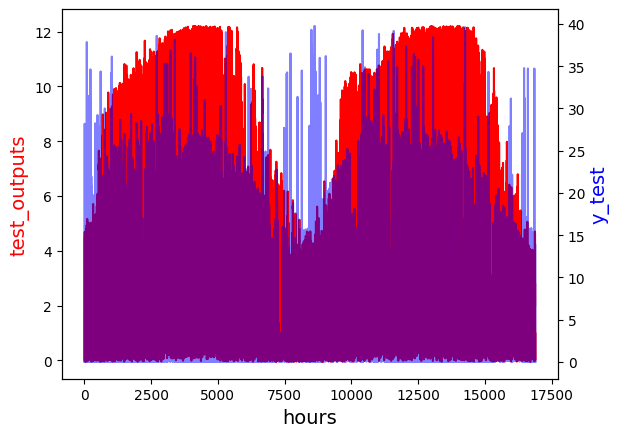

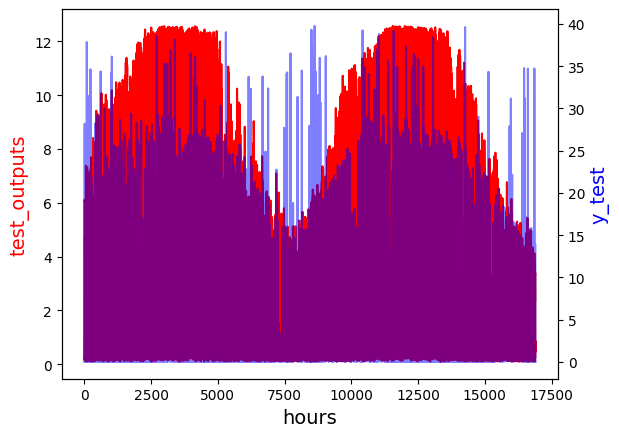

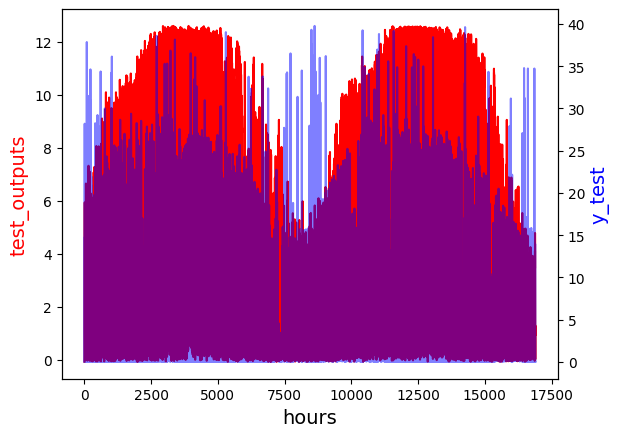

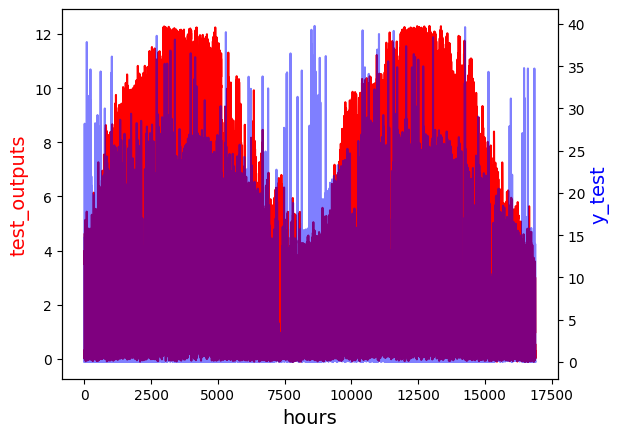

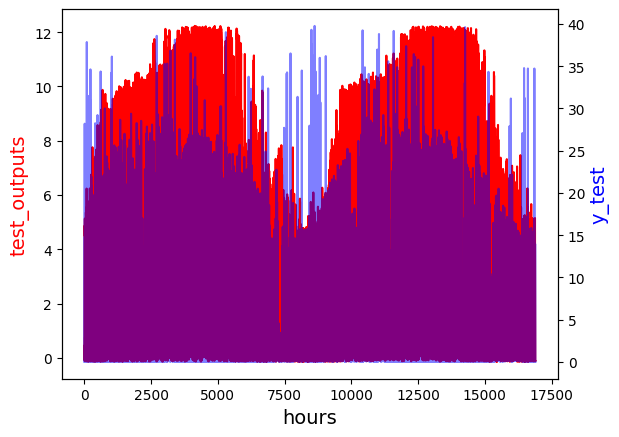

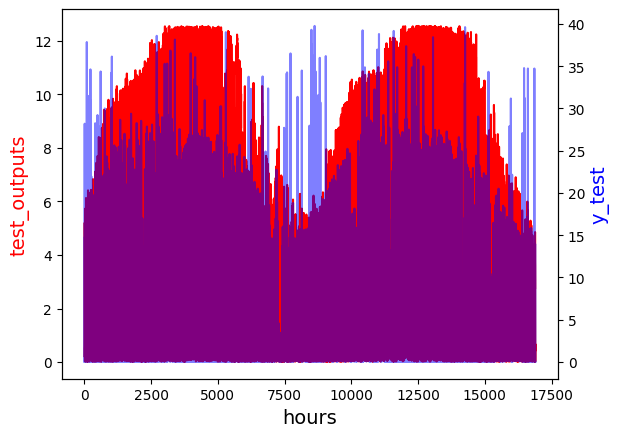

In [177]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for X_batch, y_batch in train_loader:
        #print(X_batch.view(batch_size,1,-1).shape)
        outputs = model((X_batch.view(batch_size,1,-1)))
        loss = criterion(outputs.squeeze(), y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Calculate average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')
    with torch.no_grad():
        test_outputs = model(X_test.view(X_test.shape[0],1,-1))
        test_loss = criterion(test_outputs, y_test)
        print(f'Test Loss: {test_loss.item():.4f}')
    n = -1
    i=0
    look = "test_outputs"
    ff = "y_test"
    #dd_df = pd.read_csv(f"results/.csv")
    #dd_df = dd_df.fillna(0)
    # dd_df = dd_df.drop("date", axis=1)
    #dd_df = dd_df.astype('float')

    fig,ax = plt.subplots()
    ax.plot([x for x in range(len(test_outputs))],test_outputs.cpu(),
            color="red")

    ax.set_xlabel("hours", fontsize = 14)
    # set y-axis label
    ax.set_ylabel(look,
            color="red",
            fontsize=14)

    ax2=ax.twinx()

    ax2.plot([x for x in range(len(y_test))],y_test.cpu(),color="blue",alpha = 0.5)
    ax2.set_ylabel(f"{ff}",color="blue",fontsize=14)


    fig.savefig(f'transformer_model/predXtruth_{epoch}.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [178]:
env_train = DummyVecEnv([lambda: BusArrayEnv(df=X_train.cpu(), df_true = y_train.cpu(),episode_no=5000)])
"""""TD3 model"""

from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
def train_TD3(env_train, model_name, data_length, device, episodes=2, exploration=0):

    # add the noise objects for DDPG

    batch_size=100
    buffer_size=100000
    # episodic=False
    gamma= 0.9
    lr= 0.000111834574100761
    noise_std= 0.930948896639477
    noise_type= 'normal'
    #train_freq= 16
    tau=0.001
    target_noise_clip=0.01
    policy_delay=5

    
    policy_kwargs = dict(net_arch=[300, 500, 300])

    n_actions = env_train.action_space.shape[-1]
    #param_noise = None
    
    if noise_type=='normal':
        action_noise=NormalActionNoise(mean=np.zeros(n_actions), sigma=noise_std * np.ones(n_actions))
    else:
        action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=noise_std * np.ones(n_actions))
        

    start = time.time()
    #env_train.reset()
    TD3_model = TD3('MlpPolicy', env_train, verbose=0, 
            
            batch_size=batch_size,
            buffer_size=int(buffer_size),
            gamma=gamma,
            learning_rate=lr,
            #train_freq=train_freq,
            action_noise=action_noise,
            policy_kwargs=policy_kwargs,
            target_noise_clip=target_noise_clip,
            #optimize_memory_usage=False,
            policy_delay=policy_delay,
            tau=tau,
            learning_starts=exploration * data_length,
            device=device)
    TD3_model.learn(total_timesteps=episodes*data_length)
 
    end = time.time()

    TD3_model.save(f"results/{model_name}")
    print('Training time (TD3): ', (end-start)/60,' minutes')
    return model

TD3_model = train_TD3(env_train, "hourly_1", data_length=X_train.shape[0] - 1, device='cuda', episodes=63, exploration=3)


/space/akislam/.local/lib/python3.8/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
